In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow import keras
from glob import glob
import matplotlib.pyplot as plt

In [2]:
Image_size=256
Batch_size=64
Channels=3
epochs=35

In [3]:
dataset=keras.preprocessing.image_dataset_from_directory(
    "C:/Users/cn807/OneDrive/Desktop/ML And DL/ML_AND_DL/My_Projects/Food_recognition_and_Nutrition_Analysis/Food_Data",
    shuffle=True,
    color_mode='rgb',
    image_size=(Image_size,Image_size),
    batch_size=Batch_size
)

Found 6269 files belonging to 20 classes.


In [4]:
classnames=dataset.class_names

In [5]:
classnames

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

In [6]:
len(classnames)

20

In [7]:
len(dataset)

98

In [8]:
98*Batch_size#every element is a batch of 32

6272

In [9]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[242.24185 242.24185 242.24185]
  [241.4021  241.4021  241.4021 ]
  [239.37723 239.37723 239.37723]
  ...
  [240.9252  237.9252  232.9252 ]
  [234.42264 231.42264 226.42264]
  [236.46094 233.46094 228.46094]]

 [[227.57422 227.57422 227.57422]
  [229.50131 229.50131 229.50131]
  [225.91129 225.91129 225.91129]
  ...
  [204.30365 201.30365 196.30365]
  [207.06161 204.06161 199.06161]
  [202.9288  199.9288  194.9288 ]]

 [[219.08426 219.08426 219.08426]
  [227.18411 227.18411 227.18411]
  [227.06076 227.06076 227.06076]
  ...
  [226.47452 223.47452 218.47452]
  [223.50287 220.50287 215.50287]
  [227.39343 224.39343 219.39343]]

 ...

 [[217.23053 217.23053 217.23053]
  [194.14084 194.14084 194.14084]
  [227.08362 227.08362 227.08362]
  ...
  [209.28241 213.57596 209.81424]
  [203.37448 205.63507 202.56085]
  [211.05692 211.97433 207.01562]]

 [[216.52634 216.52634 216.52634]
  [222.02652 222.02652 222.02652]
  [222.327   222.327   222.327  ]
  ...
  [193.09488 190.01901 191.

In [10]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape, label_batch)

(256, 256, 3) tf.Tensor(
[16 12  8 10 19 17  3  2  9 11  7 13  3 10  0  4  8  1 13  4  8  4  2 17
  2  0  4  8  7 11  8  5 19  8  1  9  1  7  5  9  5 11  4  3 13  8  9 13
 14  0  6  5  0 16  3  3 17 16  8 11  3  0  9  3], shape=(64,), dtype=int32)


In [11]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape, len(label_batch))

(64, 256, 256, 3) 64


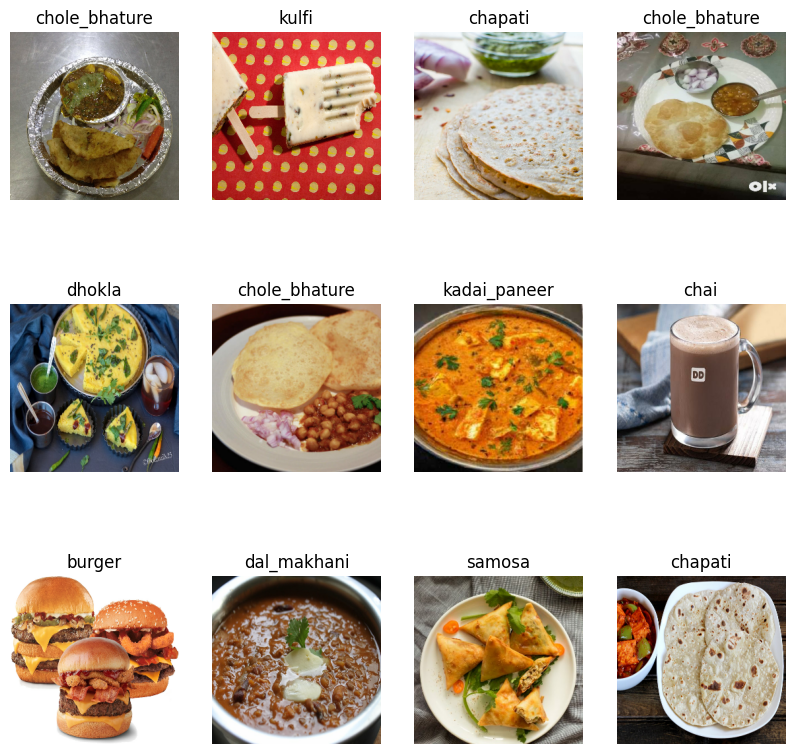

In [12]:
plt.figure(figsize=(10,10))
#for 1st take of batch there are 32 images i want to see the 10 images of 1st batch
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))#accepts 3d input
        plt.title(classnames[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

78

In [16]:
# resize_and_rescale = tf.keras.Sequential([
#   keras.layers.experimental.preprocessing.Resizing(Image_size, Image_size),
#   keras.layers.experimental.preprocessing.Rescaling(1./255),
# ])

In [17]:
data_augmentation = tf.keras.Sequential([
  keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
# train_ds = train_ds.map(
#     lambda x, y: (resize_and_rescale(x, training=True), y)
# ).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
len(train_ds)

78

In [21]:
model = tf.keras.Sequential()

# Block 1
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(Image_size,Image_size,Channels), name='block1_conv1'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# Block 2
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# Block 3
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# Block 4
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# Block 5
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# Flatten and fully connected layers
model.add(keras.layers.Flatten(name='flatten'))

# Output layer
model.add(Dense(20, activation='softmax', name='predictions'))

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
        train_ds,
        batch_size=Batch_size,
        validation_data=val_ds,
        verbose=1,
        epochs=20
    )

Epoch 1/20
78/78 [==============================] - 83s 657ms/step - loss: 30.2296 - accuracy: 0.4356 - val_loss: 15.7863 - val_accuracy: 0.6562
Epoch 2/20
78/78 [==============================] - 72s 623ms/step - loss: 15.7000 - accuracy: 0.6645 - val_loss: 10.7613 - val_accuracy: 0.7691
Epoch 3/20
78/78 [==============================] - 71s 615ms/step - loss: 13.1529 - accuracy: 0.7228 - val_loss: 9.9889 - val_accuracy: 0.7969
Epoch 4/20
78/78 [==============================] - 71s 613ms/step - loss: 12.0127 - accuracy: 0.7606 - val_loss: 9.6116 - val_accuracy: 0.7865
Epoch 5/20
78/78 [==============================] - 70s 613ms/step - loss: 10.8994 - accuracy: 0.7833 - val_loss: 6.8858 - val_accuracy: 0.8698
Epoch 6/20
78/78 [==============================] - 71s 623ms/step - loss: 10.8999 - accuracy: 0.7980 - val_loss: 8.8836 - val_accuracy: 0.8524
Epoch 7/20
78/78 [==============================] - 73s 623ms/step - loss: 10.0515 - accuracy: 0.8143 - val_loss: 5.1801 - val_accurac

In [25]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 26s 198ms/step - loss: 4.0987 - accuracy: 0.9318


In [26]:
scores

[4.0986552238464355, 0.9318181872367859]

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

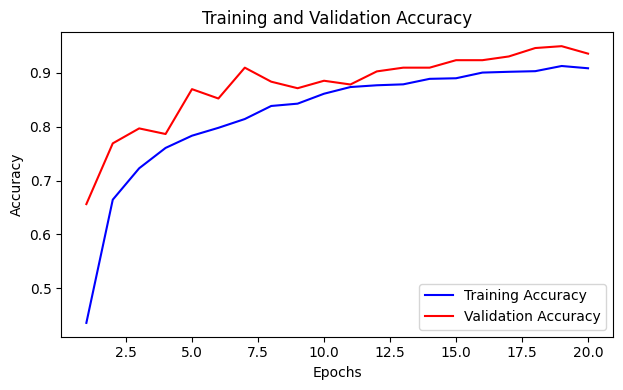

In [28]:
epochs = range(1, 21)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

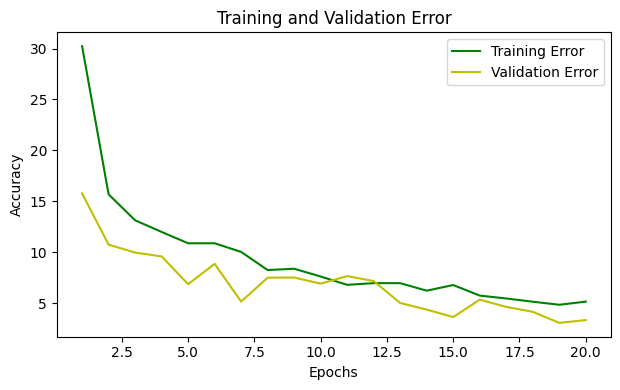

In [29]:
epochs = range(1, 21)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'g', label='Training Error')
plt.plot(epochs, val_loss, 'y', label='Validation Error')
plt.title('Training and Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
x_test = []
y_test = []
for img,label in test_ds:
    x_test.append(img)
    y_test.append(label)

In [31]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [32]:
x_test.shape , y_test.shape

((11, 64, 256, 256, 3), (11, 64))

In [33]:
x_test = x_test.reshape(64*11,256,256,3)
y_test = y_test.reshape(64*11,)

In [34]:
x_test.shape , y_test.shape

((704, 256, 256, 3), (704,))

In [35]:
y_pred = model.predict(x_test)

22/22 [==============================] - 4s 98ms/step


In [36]:
y_pred.shape

(704, 20)

In [37]:
y_pred = np.array([np.argmax(i) for i in y_pred])

In [38]:
y_pred.shape

(704,)

In [39]:
y_pred[:10]

array([ 7,  7, 12,  3,  6, 18,  3,  5, 13, 12], dtype=int64)

In [40]:
y_test[:10]

array([ 7,  7, 12,  3,  6, 18,  3,  4, 13, 12])

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
mat = confusion_matrix(y_test,y_pred)

In [43]:
import seaborn as sns

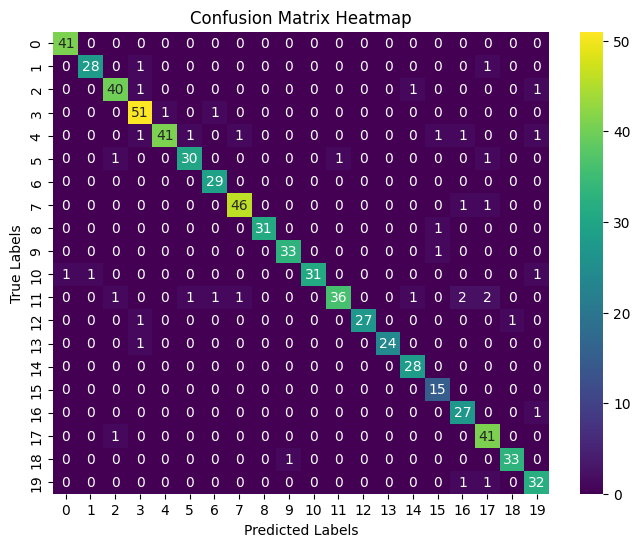

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True,cmap='viridis' , fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.97      0.93      0.95        30
           2       0.93      0.93      0.93        43
           3       0.91      0.96      0.94        53
           4       0.98      0.87      0.92        47
           5       0.94      0.91      0.92        33
           6       0.94      1.00      0.97        29
           7       0.96      0.96      0.96        48
           8       1.00      0.97      0.98        32
           9       0.97      0.97      0.97        34
          10       1.00      0.91      0.95        34
          11       0.97      0.80      0.88        45
          12       1.00      0.93      0.96        29
          13       1.00      0.96      0.98        25
          14       0.93      1.00      0.97        28
          15       0.83      1.00      0.91        15
          16       0.84      0.96      0.90        28
          17       0.87    

In [46]:
model.save("my_model.h5")

In [47]:
model.save('../Models/3')

INFO:tensorflow:Assets written to: ../Models/3\assets


INFO:tensorflow:Assets written to: ../Models/3\assets
